---
## Mnist를 통한 딥러닝 프로세스 학습
---

### [1] 모듈 로딩

In [28]:
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### [2] 랜덤 시드 생성

In [29]:
np.random.seed(97)
tf.random.set_seed(97)

### [3] train, test split

In [30]:
(X_train, y_train), (X_test, y_test) = load_data()


### [4] train,test flatten하게 만들기

In [31]:
X_train = X_train.reshape(len(X_train), -1)
y_train = y_train.reshape(len(y_train), -1)

X_test = X_test.reshape(len(X_test), -1)
y_test = y_test.reshape(len(y_test), -1)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000, 1), (10000, 784), (10000, 1))

### [5] 해당 값들 실수화(이미지의 경우 정수를 255로 나누기)

In [32]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

### [6] y값의 경우 분류이므로 categorized

In [33]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### [7] DNN 클래스 생성

In [109]:
class DNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layers1 = tf.keras.models.Sequential([
            layers.Dense(128),
            layers.Dropout(0.2),
            layers.BatchNormalization(),
            layers.ReLU()
        ])
        self.layers2 = tf.keras.models.Sequential([
            layers.Dense(2048),
            layers.Dropout(0.2),
            layers.BatchNormalization(),
            layers.ReLU()
        ])
        self.layers3 = tf.keras.models.Sequential([
            layers.Dense(10),
            layers.Softmax()
        ])
    def call(self,x):
        x = self.layers1(x)
        x = self.layers2(x)
        x = self.layers3(x)
        return x
    

In [103]:
DnnModel = DNN()
DnnModel.build(input_shape = (128, 784))

#### [8] optimizer 설정

In [104]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [105]:
DnnModel.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

---
#### [9] 콜백함수
- 모델체크 : 성능이 좋은 모델 지정, 가중치만 저장
- 조기종료 : 성능개선이 없는 경우 학습 중단
- 학습률 체크: 반복 학습시 학습률 조정
---

In [106]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = 'tmp_checkpoint.ckpt', 
                                                save_weights_only=True,
                                                save_best_only=True,
                                                monitor = 'val_loss',
                                                verbose=1)

In [107]:
DnnModel.fit(X_train, y_train, batch_size=200, callbacks=[checkpoint], epochs = 10,validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59600/60000 [============================>.] - ETA: 0s - loss: 0.1923 - accuracy: 0.9412 ETA
Epoch 00001: val_loss improved from inf to 0.10496, saving model to tmp_checkpoint.ckpt
60000/60000 [==============================] - 9s 156us/sample - loss: 0.1916 - accuracy: 0.9414 - val_loss: 0.1050 - val_accuracy: 0.9664
Epoch 2/10
59600/60000 [============================>.] - ETA: 0s - loss: 0.0863 - accuracy: 0.9735
Epoch 00002: val_loss improved from 0.10496 to 0.10179, saving model to tmp_checkpoint.ckpt
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.1018 - val_accuracy: 0.9713
Epoch 3/10
59800/60000 [============================>.] - ETA: 0s - loss: 0.0603 - accuracy: 0.9810 ETA - ETA: 0s - loss:
Epoch 00003: val_loss improved from 0.10179 to 0.10007, saving model to tmp_checkpoint.ckpt
60000/60000 [==============================] - 10s 165us/sample - loss: 0.

In [108]:
#모델 로드전
DnnModel.evaluate(X_test,y_test)


10000/10000 [==============================] - 1s 120us/sample - loss: 0.0937 - accuracy: 0.9756


[0.0936599385058944, 0.9756]

In [111]:
DnnModel.load_weights('tmp_checkpoint.ckpt')

In [112]:
#모델 로딩 후
loss, acc = DnnModel.evaluate(X_test,y_test)
print(f'loss: {loss:.3f} accuracy: {acc:.3f}')

10000/10000 [==============================] - 1s 110us/sample - loss: 0.0738 - accuracy: 0.9777
loss: 0.074 accuracy: 0.978


In [115]:
# earlystopping 사용법 3번 성능이 나빠진다면? 중단
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
DnnModel.fit(X_train, y_train, epochs=20,batch_size= 200, callbacks=[earlystopping])

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0686 - accuracy: 0.9789
Epoch 2/20
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0402 - accuracy: 0.9873
Epoch 3/20
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0299 - accuracy: 0.9911
Epoch 4/20
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0236 - accuracy: 0.9927
Epoch 5/20
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0189 - accuracy: 0.9942
Epoch 6/20
60000/60000 [==============================] - 10s 163us/sample - loss: 0.0159 - accuracy: 0.9946
Epoch 7/20
60000/60000 [==============================] - 10s 160us/sample - loss: 0.0131 - accuracy: 0.9955
Epoch 8/20
60000/60000 [==============================] - 10s 164us/sample - loss: 0.0130 - accuracy: 0.9955
Epoch 9/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.0142 - accuracy: 0.9953


In [116]:
def scheduler(epoch,lr):
    tf.print(f'learning rate : {lr:5f}')
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)   

In [117]:
# 여러 개로 넣고 싶을 시 리스트안에 담아주면 됨. 
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
DnnModel.fit(X_train, y_train, epochs=20,batch_size= 200, callbacks=[checkpoint,lr_scheduler ,earlystopping])

Train on 60000 samples
learning rate : 0.001000
Epoch 1/20
60000/60000 [==============================] - 8s 125us/sample - loss: 0.0106 - accuracy: 0.9962
learning rate : 0.001000
Epoch 2/20
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0100 - accuracy: 0.9965
learning rate : 0.001000
Epoch 3/20
60000/60000 [==============================] - 9s 154us/sample - loss: 0.0094 - accuracy: 0.9970
learning rate : 0.001000
Epoch 4/20
60000/60000 [==============================] - 9s 156us/sample - loss: 0.0130 - accuracy: 0.9958
learning rate : 0.001000
Epoch 5/20
60000/60000 [==============================] - 10s 158us/sample - loss: 0.0104 - accuracy: 0.9966
learning rate : 0.001000
Epoch 6/20
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0060 - accuracy: 0.9979
learning rate : 0.000905
Epoch 7/20
60000/60000 [==============================] - 10s 162us/sample - loss: 0.0041 - accuracy: 0.9987
learning rate : 0.000819
Epoch 8/20
60000/60

In [97]:
X_test= X_test.reshape(10000,-1)

In [98]:
test_data = X_test[1]
test_data = test_data.reshape(1,-1)
test_data.shape

(1, 784)

In [123]:
#모델 로드전
DnnModel.evaluate(X_test,y_test)


10000/10000 [==============================] - 1s 102us/sample - loss: 0.0738 - accuracy: 0.9777


[0.07376965941278031, 0.9777]

In [121]:
DnnModel.load_weights('tmp_checkpoint.ckpt')

In [122]:
#모델 로딩 후
loss, acc = DnnModel.evaluate(X_test,y_test)
print(f'loss: {loss:.3f} accuracy: {acc:.3f}')

10000/10000 [==============================] - 1s 100us/sample - loss: 0.0738 - accuracy: 0.9777 -
loss: 0.074 accuracy: 0.978


In [120]:
pred= DnnModel.predict(test_data)

In [100]:
np.argmax(pred)

2

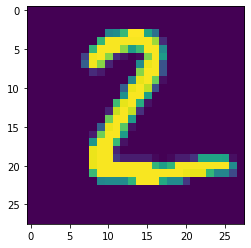

In [101]:
plt.imshow(test_data.reshape(28,28))